# End to End Multiclass Dog Breed Classification


building an end to end image classifier 

using Tensor Flow 2.0 and TensorFlow Hub


## Problem!

We are trying to identify the breed of the dog from a image data set of 120 breeds . Lets say i wanna know the breed of the dog that a cute girl has i use my model 😂😂 !

## Data !

The data that we are using is from Kaggle's dog breed competition!


## Evaluation!

The evaluation is the file with prediction probablities for test image!

## Features!

* Unstructured Data (deeplearning/transfer learning)

* 120 breeds of Dog (`120 different classes`)

* `10000+` Training Images and another 10000 `test` Images






In [2]:
# !unzip "drive/My Drive/dog-breed-files/dog-breed-identification.zip" -d "/content/drive/My Drive/dog-breed-files"


In [3]:
# import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version:",tf.__version__)
print("Tf Hub Version",hub.__version__)


# Check for GPU availablity!

print("GPU","Hey i cannot believe u have gpu access" if tf.config.list_physical_devices("GPU") else "not available :(")

TF Version: 2.3.0
Tf Hub Version 0.8.0
GPU Hey i cannot believe u have gpu access


In [4]:
# converting the data into tensors(Numeric Format)!

import pandas as pd
labels_csv=pd.read_csv("drive/My Drive/dog-breed-files/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     5d400c440b6a096c335abcae022d4519  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


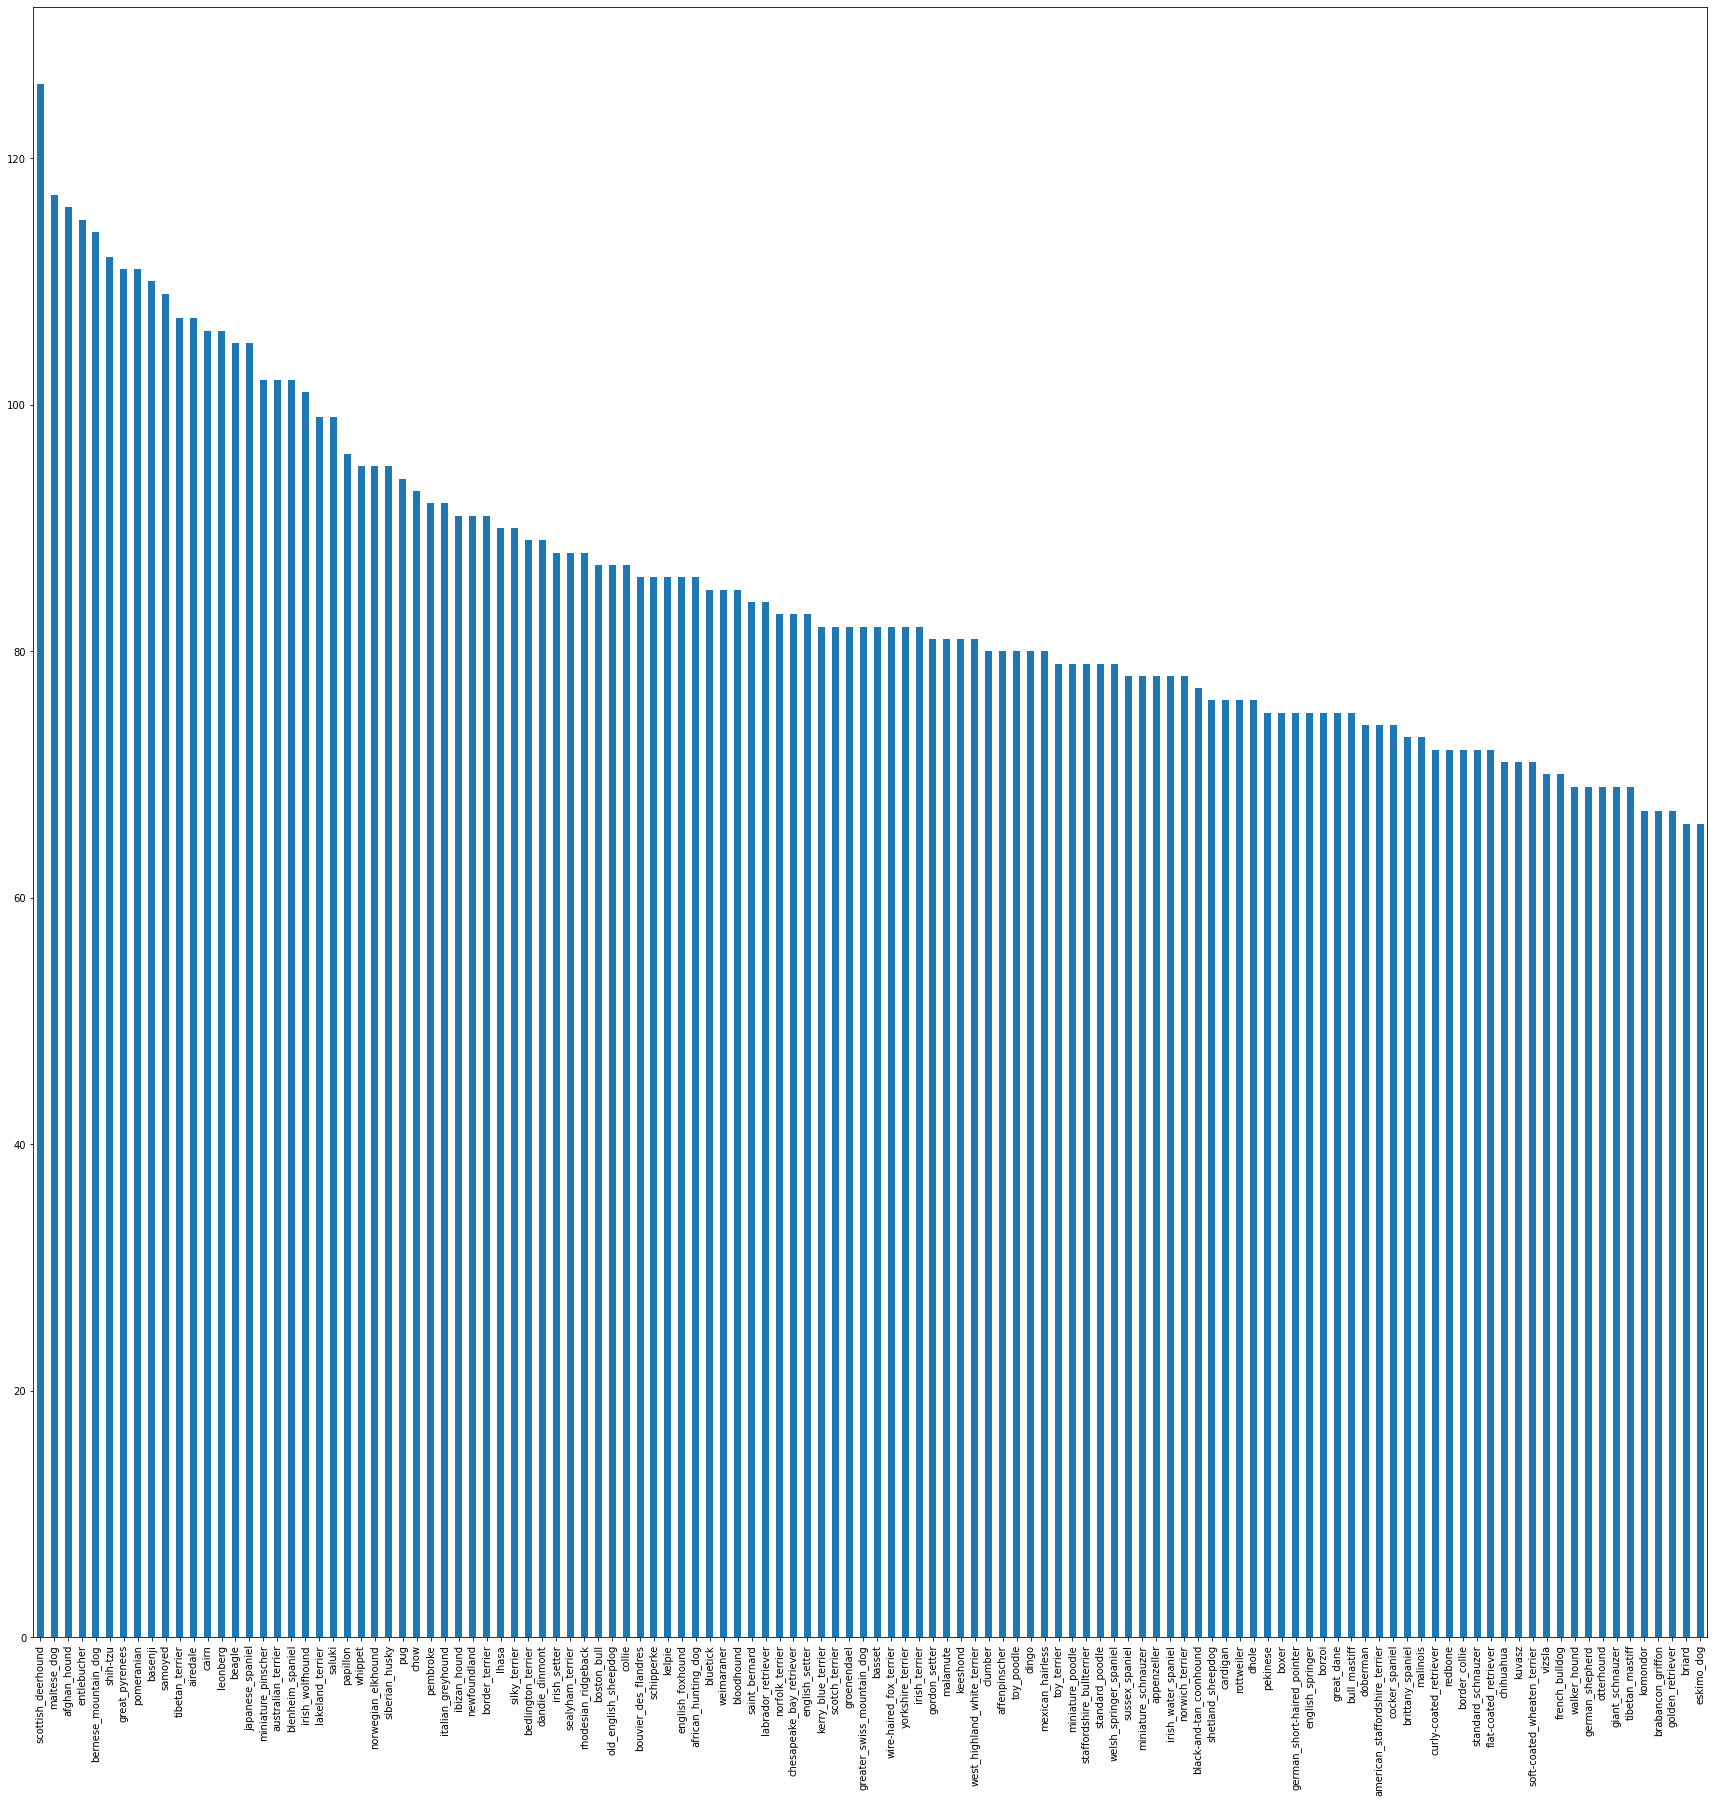

In [5]:
labels_csv["breed"].value_counts().plot( kind="bar", figsize=(30,30) );

In [6]:
labels_csv["breed"].value_counts().median()

82.0

In [7]:
labels_csv.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
filenames=["drive/My Drive/dog-breed-files/train/"+fname + ".jpg" for fname in labels_csv["id"] ]

filenames[:5]

['drive/My Drive/dog-breed-files/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog-breed-files/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog-breed-files/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog-breed-files/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog-breed-files/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [9]:
import numpy as np 
labels=labels_csv["breed"]
labels=np.array(labels)
len(labels)

10222

In [10]:
if len(labels)==len(filenames):
  print("number of labels matches number of filenames!")
else:
  print("Number of labels does not match")

number of labels matches number of filenames!


In [11]:
# Find the unique values  

unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [12]:
# Turn a single label into an array of booleans!
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
# Turn every label into a boolean array!

boolean_labels=[label==unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [14]:
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [15]:
# Create The Validation Set!

In [16]:
x=filenames
y=boolean_labels


In [17]:
# lets begin working our way through starting with 1000 images!

NUM_IMAGES=1000 #@param {type:"slider",min:1 ,max:1000}

from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [18]:
X_train[:2],y_train[:2]

(['drive/My Drive/dog-breed-files/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/dog-breed-files/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False

#### `Preprocessing Images!` (Turning into numeric/tensors)

Keep in mind to resize the image

In [20]:
# Convert image to numpy array!
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

In [21]:
## Convert image into tensor!
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [22]:
IMG_SIZE=224
def process_image(image_path,img_size=IMG_SIZE):
  """
  Turns image into a tensor!
  """
  image=tf.io.read_file(image_path)
  # Turn jpeg into RGB 
  image=tf.image.decode_jpeg(image,channels=3)
  # Normalization!

  # COnvert the color value  from 0-255 to to 0 and 1's!
  image=tf.image.convert_image_dtype(image,tf.float32)

  # Resize the image to (224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image




  

#### Turn our data into baches!

we use 32 as our batch size!

in order to use tensor flow efficiently we need to convert into the tensor tuple (IMAGE , label)

In [23]:
def get_image_label(image_path,label):
  """
  Takes image  file path and associated label returns a tuple!
  """
  image=process_image(image_path)
  return image,label





In [24]:
# Using this function to convert into batches!

BATCH_SIZE=32
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Creates batches out of data out of image (x) and label(y) pairs!
  Shuffles the data if its training data but doesnt shuffle if its validation data!
  also accepts test data as input (nO Labels!)
  """
  ## there are no labels present in test data!
  if test_data:
    print("creating test data batches!")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X))) # contains only file path no labels!
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is a valid data set!
  if valid_data:
    print("Creating validation data batches!")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training batch!")
    # Turn the filepaths and labels into tensors!
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    # here we shuffle the pathname and label because its faster!
    data=data.shuffle(buffer_size=len(X))
    # Create image label tuples turns the image path into a preprocessed image!
    data=data.map(get_image_label)
    # Turn the training data into batches
    data_batch=data.batch(BATCH_SIZE)
    return data_batch

In [25]:
## Create training and valid test batches!

train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)

Creating training batch!
Creating validation data batches!


In [26]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [27]:
import matplotlib.pyplot as plt

# create a function for viewing images in a data Batch

def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch!

  """
  # setup a figure!
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("on")
  

In [28]:
train_images,train_labels=next(train_data.as_numpy_iterator())


In [29]:
len(train_images), len(train_labels)

(32, 32)

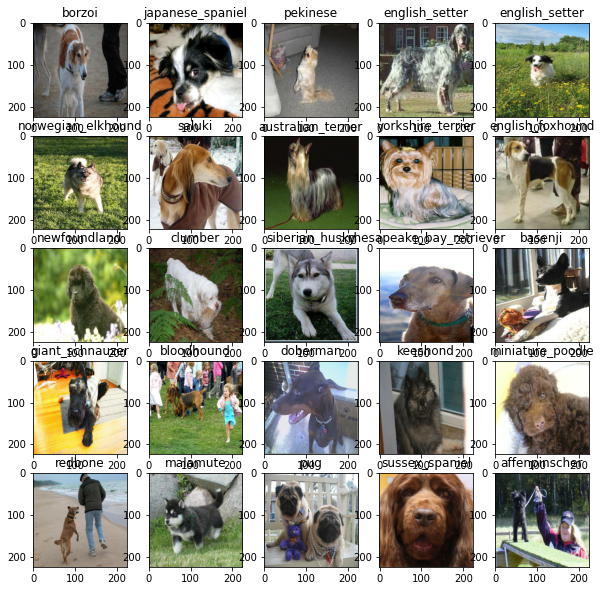

In [30]:
show_25_images(train_images,train_labels)

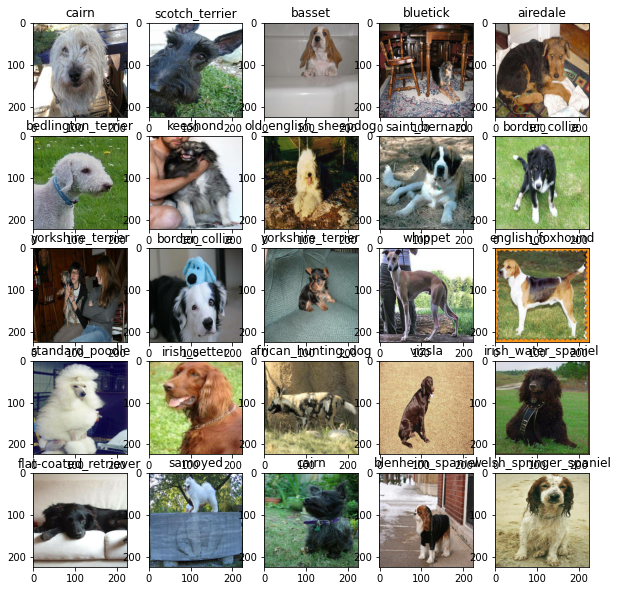

In [31]:
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building model

We need to define the following!

* The input shape of our model
* THe output shape of our model
* Url of the model of we want to use(HUB)

In [32]:
##Build a model!

INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3] 
OUTPUT_SHAPE=len(unique_breeds)

# SETUP MODEL URL FROM TENSORFLOW HUb!

MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"




Lets put all input ,output and model together into a keras deep learning model!

In [33]:
# This function defines the layers in keras model in sequential fashion..

def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with",MODEL_URL)
  

  model=tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax")
  ])
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
  model.build(INPUT_SHAPE)
  return model


In [34]:
model=create_model()
model.summary()


Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating CallBack!

Using Callbacks we can understand our progress of our model!

2 call backs!

* tensor board-progress
* Overtraining prevention by stopping the progress!


In [35]:
## Loading tensor board notebook extension

%load_ext tensorboard


In [36]:
import datetime

# Create  a function for building TensorBoard Callback!

def create_tensorboard_callback():
  # Create a log directory for storing tensor board logs!
  logdir=os.path.join("drive/My Drive/dog-breed-files/logs" ,
                      datetime.datetime.now().strftime(""))
  return tf.keras.callbacks.TensorBoard(logdir)


In [38]:
# Creating early stopping callback!

early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)
